In [1]:
pip install tsfresh

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 1.3 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/9.6 MB 1.3 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/9.6 MB 931.2 kB/s eta 0:00:10
   ---- ----------------------------------- 1.0/9.6 MB 986.7 kB/s eta 0:00:09
   ---- ----------------------------------- 1.0/9.6 MB 986.7 kB/s eta 0:00:09
   ---- ----------------------------------- 1.0/9.6 MB 986.7 kB/s eta 0:00:09
   ---- ----------------------------------- 1.0/9.6 MB 986.7 kB/s eta 0:00:09
   ----- ---------------------------------- 1.3/9.6 MB 615.4 


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd 
import numpy as np 
import os
from google.cloud import bigquery
from google.oauth2 import service_account
# declaramos las credenciales al entorno de desarollo
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "..\\..\\bd\\0_docs\\datahub-deacero-adojeda.json"

client = bigquery.Client()
consulta = """
    # Consulta PVO por ubicación
    SELECT * FROM `datawarehouse-414323.Dev_AldoOjeda.filiales_sin_estribos` LIMIT 1000
    """
query = client.query(consulta)

base = query.to_dataframe(create_bqstorage_client=True)

Forbidden: 403 Access Denied: Table datawarehouse-414323:Dev_AldoOjeda.filiales_sin_estribos: User does not have permission to query table datawarehouse-414323:Dev_AldoOjeda.filiales_sin_estribos, or perhaps it does not exist.; reason: accessDenied, message: Access Denied: Table datawarehouse-414323:Dev_AldoOjeda.filiales_sin_estribos: User does not have permission to query table datawarehouse-414323:Dev_AldoOjeda.filiales_sin_estribos, or perhaps it does not exist.

Location: US
Job ID: 416e89e6-f3fd-475b-92b1-5ec7781c011d


In [ ]:
import pandas as pd 
import numpy as np 
import os
from google.cloud import bigquery
from google.oauth2 import service_account
# declaramos las credenciales al entorno de desarollo
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "..\\..\\bd\\0_docs\\datahub-deacero-adojeda.json"

if False: 
    client = bigquery.Client()
    consulta = """
        # Consulta PVO por ubicación
        with table_pvo as(
        SELECT
        FORMAT_DATE('%Y-%m-%d', PARSE_DATE('%B.%Y', mes_anio)) AS MesAnio,
        nom_grupo AS NombreGrupo,
        nom_direccion AS NombreDireccion,
        nom_subdireccion AS NombreSubdireccion,
        nom_familia_asociada as nom_familia_asociada,
        nom_ubicacion as nom_ubicacion,   # agregamos dato
        nom_grupo_estadistico1 AS NombreGrupoEstadistico1,
        nom_grupo_estadistico2 AS NombreGrupoEstadistico2,
        nom_grupo_estadistico3 AS NombreGrupoEstadistico3,
        nom_articulo as nom_articulo,
        sum(toneladas_pvo) as toneladas_pvo,
        sum(toneladas_dim_capacidades) as toneladas_dim_capacidades,
        sum(toneladas_plan_ventas) as toneladas_plan_ventas,
        sum(toneladas_presupuesto) as toneladas_presupuesto
        FROM `datahub-deacero.mart_comercial.comercial` 
        where
        -- Descartamos los siguientes campos
        nom_grupo NOT IN ('EMPRESAS RELACIONADAS','TRASPASOS E INTEREMPRESAS') --AND NombreDireccion NOT IN ('EXPORTACIÓN ALAMBRES')
        AND
        nom_subdireccion NOT IN ('EXCEDENTES ACEROS','EXCEDENTES ALAMBRES','RESTO ALAMBRES','RESTO INGETEK')
        AND
        nom_grupo_estadistico1 NOT IN ('CHATARRA','DEACERO POWER','INTERNAS PRODUCCION ','LOGÍSTICA','SEGUNDAS') #'PALANQUILLA'
        AND
        nom_grupo_estadistico2 NOT IN ('SEGUNDAS / EXCEDENTES','CHQ')
        AND
        nom_grupo_estadistico3 NOT IN ('DESPERDICIO','ALAMBRON SEGUNDAS','ALAMBRON EXCEDENTES','ALAMBRON TERCEROS','ALAMBRON OTROS','PILOTES','PISO','POLIZAS') #'DERECHO DE VIA'
        -- Necesitamos que la informacion no sea nula
        AND nom_articulo IS NOT NULL
        and nom_ubicacion IS NOT NULL
        GROUP BY
        MesAnio,
        NombreGrupo,
        NombreDireccion,
        NombreSubdireccion,
        nom_ubicacion,
        nom_familia_asociada,
        NombreGrupoEstadistico1,
        NombreGrupoEstadistico2,
        NombreGrupoEstadistico3,
        nom_articulo
        )
        select * from table_pvo
        where DATE(MesAnio) >= DATE_TRUNC(CURRENT_DATE(), MONTH) 
        order by MesAnio, 
        NombreGrupo, 
        NombreDireccion, 
        NombreSubdireccion,
        nom_ubicacion,
        nom_familia_asociada,
        nom_articulo
            """
    
    query = client.query(consulta)
    pvo = query.to_dataframe(create_bqstorage_client=True)
    pvo.to_csv(r".\consultas\pvo.csv", index=False)

c:\Users\adojeda\OneDrive - deacero.com\dev\0_envs\.bigquery\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [ ]:
if False: 
    client = bigquery.Client()
    consulta = """
    # Generación de Consulta GE3-SUBDIR-PL
    with table_fact AS (
    with data_base AS (
    SELECT
    FORMAT_DATE('%Y-%m-%d', PARSE_DATE('%B.%Y', mes_anio)) AS MesAnio,
    nom_grupo AS NombreGrupo,
    nom_direccion AS NombreDireccion,
    nom_subdireccion AS NombreSubdireccion,
    nom_ubicacion as nom_ubicacion,
    nom_familia_asociada as nom_familia_asociada,
    nom_grupo_estadistico1 AS NombreGrupoEstadistico1,
    nom_grupo_estadistico2 AS NombreGrupoEstadistico2,
    nom_grupo_estadistico3 AS NombreGrupoEstadistico3,
    nom_articulo AS nom_articulo,
    toneladas_facturadas AS Toneladas_Facturadas
    FROM `datahub-deacero.mart_comercial.comercial` 
    WHERE EXTRACT(YEAR FROM fecha) >= 2024
    AND nom_gerencia NOT IN ('ACERIAS SPOT')
    )
    # Agregar un cambio de valores para los cuales Toneladas_Facturas es 0 si el valor original es negativo
    SELECT 
    data_base.MesAnio,
    data_base.NombreGrupo,
    data_base.NombreDireccion,
    data_base.NombreSubdireccion,
    data_base.nom_ubicacion,
    data_base.nom_familia_asociada,
    data_base.NombreGrupoEstadistico1,
    data_base.NombreGrupoEstadistico2,
    data_base.NombreGrupoEstadistico3,
    data_base.nom_articulo,
    SUM(data_base.Toneladas_Facturadas) AS Toneladas_Facturadas
    FROM data_base
    WHERE 
    -- Descartamos los siguientes campos
    NombreGrupo NOT IN ('EMPRESAS RELACIONADAS','TRASPASOS E INTEREMPRESAS') --AND NombreDireccion NOT IN ('EXPORTACIÓN ALAMBRES')
    AND
    NombreSubdireccion NOT IN ('EXCEDENTES ACEROS','EXCEDENTES ALAMBRES','RESTO ALAMBRES','RESTO INGETEK')
    AND
    NombreGrupoEstadistico1 NOT IN ('CHATARRA','DEACERO POWER','INTERNAS PRODUCCION ','LOGÍSTICA','SEGUNDAS') #'PALANQUILLA'
    AND
    NombreGrupoEstadistico2 NOT IN ('SEGUNDAS / EXCEDENTES','CHQ')
    AND
    NombreGrupoEstadistico3 NOT IN ('DESPERDICIO','ALAMBRON SEGUNDAS','ALAMBRON EXCEDENTES','ALAMBRON TERCEROS','ALAMBRON OTROS','PILOTES','PISO','POLIZAS') #'DERECHO DE VIA'
    -- Necesitamos que la informacion no sea nula
    AND NombreGrupo IS NOT NULL
    AND NombreDireccion IS NOT NULL
    AND NombreSubdireccion IS NOT NULL
    AND NombreGrupoEstadistico1 IS NOT NULL
    AND NombreGrupoEstadistico2 IS NOT NULL
    AND NombreGrupoEstadistico3 IS NOT NULL
    AND nom_articulo IS NOT NULL
    and nom_ubicacion IS NOT NULL
    and Toneladas_Facturadas IS NOT NULL
    GROUP BY
    data_base.MesAnio,
    data_base.NombreGrupo,
    data_base.NombreDireccion,
    data_base.NombreSubdireccion,
    data_base.nom_ubicacion,
    data_base.nom_familia_asociada,
    data_base.NombreGrupoEstadistico1,
    data_base.NombreGrupoEstadistico2,
    data_base.NombreGrupoEstadistico3,
    data_base.nom_articulo
    )
    
    select * from table_fact
    where
    DATE(MesAnio) <= DATE_TRUNC(CURRENT_DATE(), MONTH)
    order by
    MesAnio,
    NombreGrupo,
    NombreDireccion,
    NombreSubdireccion,
    nom_ubicacion,  
    nom_familia_asociada,
    NombreGrupoEstadistico1,
    NombreGrupoEstadistico2,
    NombreGrupoEstadistico3,
    nom_articulo
    """
    query = client.query(consulta)
    fact = query.to_dataframe(create_bqstorage_client=True)
    fact.to_csv(r".\consultas\fact.csv", index=False)

c:\Users\adojeda\OneDrive - deacero.com\dev\0_envs\.bigquery\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


* ALAMBRON -ge3
* PALANQUILLA-G1 [Solo se vede a 1SHOT]
* PERFILES- ge3
* SOLUCIONES-GE3
* VARILLA-GE3
* TODOS LOS DEMAS A NIVEL SKU

In [31]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import hashlib
from datetime import datetime
# ------------------------------------------------------
date = datetime.now().date()
# ------------------------------------------------------
m, y = date.month, date.year
# ------------------------------------------------------
min_date = date.replace(year= y-1, month = m, day = 1)

min_date_2 = date.replace(year= y-2, month = m, day = 1)

max_date = date.replace( month = m-1, day = 1)

actual_date = date.replace(day = 1)

min_date, max_date, actual_date

(datetime.date(2024, 8, 1),
 datetime.date(2025, 7, 1),
 datetime.date(2025, 8, 1))

In [5]:
var= "toneladas_plan_ventas"

var2del = "toneladas_pvo"

pvo = pd.read_csv(r".\consultas\pvo.csv", engine="pyarrow")

pvo.nom_familia_asociada = pvo.nom_familia_asociada.str.replace(r'\s+|\t+', ' ', regex=True)

pvo.nom_ubicacion = pvo.nom_ubicacion.str.replace(r'\s+|\t+', ' ', regex=True)

pvo["Base"] = "pvo"

pvo = pvo.drop(columns= ["toneladas_dim_capacidades", var2del]) #"toneladas_pvo"

print(pvo.shape)

pvo = pvo.dropna(subset = [var, "nom_articulo", "nom_ubicacion"], how="any")

print(pvo.shape)

pvo["MesAct_fact"] = False

(1210784, 13)
(128244, 13)


<Axes: xlabel='MesAnio'>

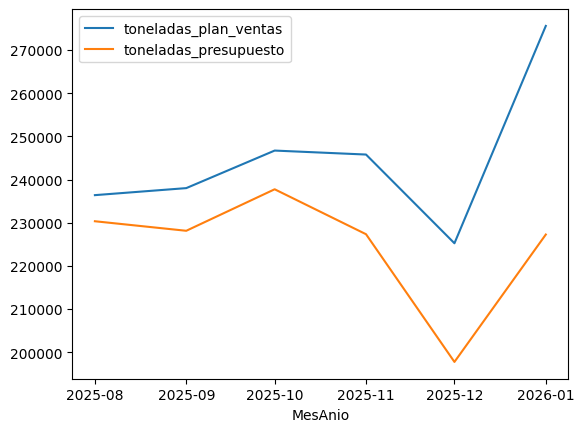

In [34]:
pvo.groupby("MesAnio").agg({"toneladas_plan_ventas":"sum", "toneladas_presupuesto" :"sum"}).plot()

In [40]:
fact = pd.read_csv(r".\consultas\fact.csv", engine="pyarrow")
fact.nom_familia_asociada = fact.nom_familia_asociada.str.replace(r'\s+|\t+', ' ', regex=True)
fact.nom_ubicacion = fact.nom_ubicacion.str.replace(r'\s+|\t+', ' ', regex=True)
fact["Base"] = "fact"
fact = fact[(fact.MesAnio >= min_date_2) & (fact.MesAnio >= min_date_2) ]
fact["MesAct_fact"] = np.where( fact.MesAnio == actual_date, True, False)
fact.nom_familia_asociada = np.where(fact.nom_familia_asociada.isna(), fact.nom_articulo, fact.nom_familia_asociada) 
fact.MesAnio.nunique()

20

In [41]:
fact.groupby("MesAnio").agg({"Toneladas_Facturadas":"sum"})

,Toneladas_Facturadas
MesAnio,
2024-01-01,289015.387967
2024-02-01,218932.195282
2024-03-01,193328.534326
2024-04-01,259452.015863
2024-05-01,230355.998602
2024-06-01,227304.401947
2024-07-01,223398.136132
2024-08-01,245334.775560
2024-09-01,217223.703738


In [42]:
fact.NombreGrupoEstadistico1.value_counts()

NombreGrupoEstadistico1
MALLAS Y ALAMBRES      116313
PERFILES                15128
VARILLA                 10285
ALAMBRON                 4069
INDUSTRIAL FILIALES      3064
SOLUCIONES               2668
CABLES                   1891
PALANQUILLA                19
Name: count, dtype: int64

In [8]:
filter_level = {"skus_ge1": ["MALLAS Y ALAMBRES"]}
fact_skus = fact[fact.NombreGrupoEstadistico1.isin(filter_level["skus_ge1"])]
fact_skus

,MesAnio,NombreGrupo,NombreDireccion,NombreSubdireccion,nom_ubicacion,nom_familia_asociada,NombreGrupoEstadistico1,NombreGrupoEstadistico2,NombreGrupoEstadistico3,nom_articulo,Toneladas_Facturadas,Base,MesAct_fact
82,2024-01-01,ACEROS,ACEROS MEXICO,MAYORISTAS ACEROS,ACERÍA CELAYA,(57) VARILLA LAM CALIENTE,MALLAS Y ALAMBRES,SISTEMAS CONSTRUCTIVOS,REDONDO CARRETERO COMERCIALES,"REDONDO CARRETERO 506 G42 1 1/2"" 12.10 M P07 R",106.6000,fact,False
83,2024-01-01,ACEROS,ACEROS MEXICO,MAYORISTAS ACEROS,ACERÍA CELAYA,(57) VARILLA LAM CALIENTE,MALLAS Y ALAMBRES,SISTEMAS CONSTRUCTIVOS,REDONDO CARRETERO COMERCIALES,"REDONDO CARRETERO 506 G42 1 1/4"" 12.10 M P06 R",54.9400,fact,False
132,2024-01-01,ACEROS,ACEROS MEXICO,MAYORISTAS ACEROS,ALAMBRES MÉXICO,(184) FIBRA DEACERO,MALLAS Y ALAMBRES,SISTEMAS CONSTRUCTIVOS,FIBRAS DEACERO,FIBRA DEACERO P50-100 50MM 1.0MM 20KG,0.2000,fact,False
133,2024-01-01,ACEROS,ACEROS MEXICO,MAYORISTAS ACEROS,ALAMBRES MÉXICO,(22) VARILLA 6000,MALLAS Y ALAMBRES,NEGROS ANTAAC,VARILLA 6000,VARILLA 6000 1/4 6.0 M,25.7100,fact,False
134,2024-01-01,ACEROS,ACEROS MEXICO,MAYORISTAS ACEROS,ALAMBRES MÉXICO,(22) VARILLA 6000,MALLAS Y ALAMBRES,NEGROS ANTAAC,VARILLA 6000,VARILLA 6000 5/16 6.0 M,12.1900,fact,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153367,2025-08-01,USA,EUA - CANADA,KEY STEEL ACCOUNTS,HOUSTON,(FA) - RE-MESH,MALLAS Y ALAMBRES,NEGROS ANTAAC,REMESH,"RE-MESH 6"" 6"" 10 10 42"" 84"" (BUNDLE W/100 UNITS)",0.2410,fact,True
153368,2025-08-01,USA,EUA - CANADA,KEY STEEL ACCOUNTS,HOUSTON,(FA) - RE-MESH,MALLAS Y ALAMBRES,NEGROS ANTAAC,REMESH,"RE-MESH 6"" 6"" 10 10 8FT 15FT (BUNDLE W/100 UNITS)",15.9150,fact,True
153369,2025-08-01,USA,EUA - CANADA,KEY STEEL ACCOUNTS,HOUSTON,(FA) - RE-MESH,MALLAS Y ALAMBRES,NEGROS ANTAAC,REMESH,"RE-MESH 6"" 6"" 6 6 8FT 15FT (BUNDLE W/50 UNITS)",4.3008,fact,True
153370,2025-08-01,USA,EUA - CANADA,KEY STEEL ACCOUNTS,HOUSTON,(FA) - RE-MESH,MALLAS Y ALAMBRES,NEGROS ANTAAC,REMESH,"RE-MESH 6"" 6"" 6 6 8FT 20FT (BUNDLE W/50 UNITS)",42.3300,fact,True


# Analisis de Productos MYA

In [9]:
print(f"Existe un total de {fact_skus.nom_articulo.nunique()} articulos")
print(f"Existe un total de {fact_skus.nom_ubicacion.nunique()} puntos logisticos")
print(f"Existe un total de {fact_skus.nom_familia_asociada.fillna(fact_skus.nom_articulo).nunique()} Familias Asociadas")
print(f"Existe un total de {fact_skus.NombreGrupoEstadistico3.nunique()} GE3")

Existe un total de 6665 articulos
Existe un total de 81 puntos logisticos
Existe un total de 216 Familias Asociadas
Existe un total de 184 GE3


In [10]:
fact.groupby("NombreGrupoEstadistico1").agg({"Toneladas_Facturadas": "sum"}).div(fact.Toneladas_Facturadas.sum()).round(4).sort_values("Toneladas_Facturadas", ascending=False).style.format("{:.2%}")

,Toneladas_Facturadas
NombreGrupoEstadistico1,
VARILLA,34.17%
MALLAS Y ALAMBRES,26.04%
PERFILES,17.13%
ALAMBRON,15.09%
SOLUCIONES,3.84%
PALANQUILLA,2.97%
INDUSTRIAL FILIALES,0.60%
CABLES,0.15%


In [11]:
fact_skus.groupby("NombreGrupoEstadistico2").agg({"Toneladas_Facturadas": "sum"}).div(fact_skus.Toneladas_Facturadas.sum()).round(4).sort_values("Toneladas_Facturadas", ascending=False).style.format("{:.2%}")

,Toneladas_Facturadas
NombreGrupoEstadistico2,
NEGROS ANTAAC,23.37%
INDUSTRIAL NEGROS,23.31%
INDUSTRIAL GALV.,13.45%
CERCOS,11.83%
FASTENERS MCSW,8.32%
SISTEMAS CONSTRUCTIVOS,7.81%
CERCOS ESPECIALIZADOS,6.99%
FERRETEROS,3.87%
INDUSTRIAL FASTENERS,1.04%


In [12]:
fact_skus.groupby("NombreGrupoEstadistico3").agg({"Toneladas_Facturadas": "sum"}).div(fact_skus.Toneladas_Facturadas.sum()).round(4).sort_values("Toneladas_Facturadas", ascending=False).style.format("{:.2%}")

,Toneladas_Facturadas
NombreGrupoEstadistico3,
CASTILLO HOJAS,7.68%
ALAMBRE CROMADO-BRILLANTE,7.01%
ALAMBRE RECOCIDO,5.35%
ALAMBRE DE PÚAS,4.60%
COLCHONERO 13 - 14,4.41%
MALLA SOLDADA 88 Y 1010,3.99%
A.GALV. 1/4-14,3.64%
COLCHONERO NTC,3.63%
CICLONICA GALVANIZADA,3.50%


In [13]:
fact_skus.groupby(["NombreGrupo"]).Toneladas_Facturadas.sum().div(fact_skus.Toneladas_Facturadas.sum()).round(4).sort_values(ascending=False).reset_index().style.format({"Toneladas_Facturadas":"{:.2%}"})

,NombreGrupo,Toneladas_Facturadas
0,ALAMBRES,54.58%
1,USA,31.29%
2,FILIALES ALAMBRES,6.90%
3,ACEROS,5.48%
4,DEACERO SOLUTIONS,1.75%


In [14]:
fact_skus.groupby(["NombreGrupo"]).nom_articulo.nunique().div(fact_skus.nom_articulo.nunique()).round(4).sort_values(ascending=False).reset_index().style.format({"nom_articulo":"{:.2%}"})

,NombreGrupo,nom_articulo
0,ALAMBRES,53.98%
1,USA,36.52%
2,DEACERO SOLUTIONS,9.18%
3,ACEROS,5.18%
4,FILIALES ALAMBRES,4.77%


<Axes: xlabel='MesAnio'>

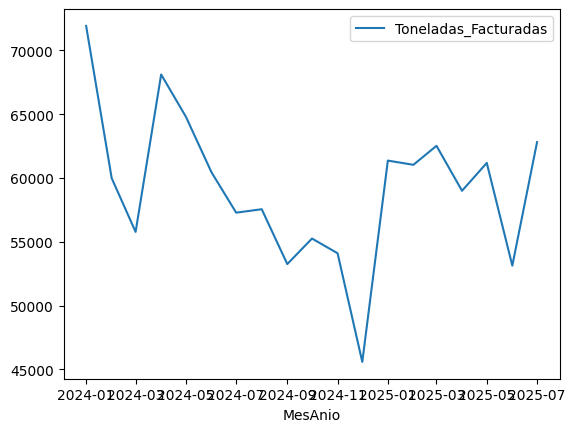

In [15]:
fact_skus.groupby(["MesAnio", "NombreGrupoEstadistico1"]).Toneladas_Facturadas.sum().reset_index().set_index("MesAnio")[:-1].plot()

<Axes: xlabel='MesAnio', ylabel='Toneladas_Facturadas'>

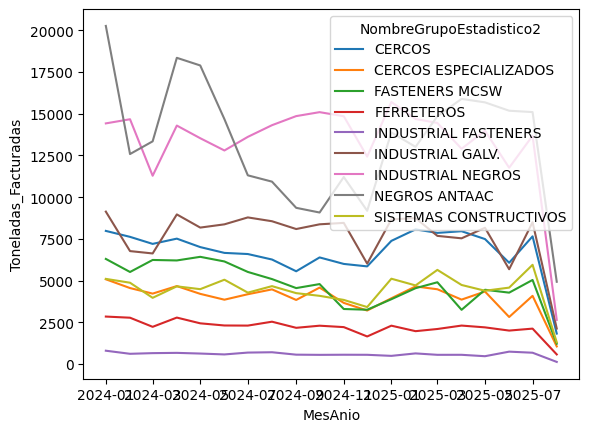

In [17]:
import seaborn as sns
data = fact_skus.groupby(["MesAnio", "NombreGrupoEstadistico2"]).Toneladas_Facturadas.sum().reset_index()
sns.lineplot(data=data, x="MesAnio", y="Toneladas_Facturadas", hue="NombreGrupoEstadistico2")

# Propuesta Arbol Decisión

## 1) Calculo de Indicadores

In [18]:
# Agrupamos por familia y ubicacion (pl)
fam_pl = fact_skus.groupby(["nom_articulo", "nom_ubicacion", "MesAnio"])["Toneladas_Facturadas"].sum().reset_index()
fam_pl["id"] = fam_pl.nom_articulo + "_" + fam_pl.nom_ubicacion
pvo["id"] = pvo.nom_articulo + "_" + pvo.nom_ubicacion
fam_pl.id.nunique() # 1944 combinaciones de pl & familias

15601

In [19]:
pvo_bu = pvo[(pvo.toneladas_plan_ventas > 0 ) & (pvo.MesAnio == actual_date)].groupby(["id", "NombreGrupo"]).agg({"toneladas_plan_ventas":"sum"})
pvo_bu = pvo_bu.unstack(-1)
pvo_bu.columns = [i[1] + "_pv_1" for i in pvo_bu.columns]
pvo_bu = pvo_bu.reset_index()

In [20]:
print(fam_pl.shape[0])
fam_pl_f =  fam_pl[fam_pl.Toneladas_Facturadas>0]
print(fam_pl_f.shape[0])
fam_pl_f =  fam_pl[fam_pl.Toneladas_Facturadas>0]

kpi2 = fam_pl_f.groupby("id").agg({"MesAnio":["min", "max"]})
kpi2.columns = ["fecha_inicio", "fecha_fin"]
kpis = fam_pl_f.groupby("id").agg({ "nom_articulo": "count", "Toneladas_Facturadas":["mean", "std"]})

kpis.columns = ["mcc", "ton_media", "ton_std"] # .rename(columns = {"nom_articulo": "mcc", "Toneladas_Facturadas": "ton_media"} )
kpis["ton_std"] = kpis["ton_std"].fillna(-100) 
kpis = kpis.merge(kpi2, left_index=True, right_index=True)
kpis["r_ton_med"] = pd.qcut(kpis.ton_media, q = 4, labels = [1,2,3,4])
kpis["r_mcc_med"] = pd.qcut(kpis.ton_media, q = 4,  labels = [1,2,3,4])
kpis.fecha_inicio = pd.to_datetime(kpis.fecha_inicio) 
kpis.fecha_fin = pd.to_datetime(kpis.fecha_fin) 
kpis["qdate"] = kpis.fecha_inicio.dt.year.mul(100) + kpis.fecha_inicio.dt.quarter
kpis["qdate"]= np.where(kpis.fecha_inicio.dt.year < 2024, kpis.fecha_inicio.dt.year.mul(100), kpis["qdate"] )
kpis["msc"] = kpis.fecha_fin.max() - kpis.fecha_fin
kpis["msc"] = kpis["msc"].dt.days.div(30).round(0)
kpis["r_msc"] = pd.cut(kpis.msc, bins = [-np.inf, 1, 2, 3, 4, 8 , 10,12, np.inf], labels = [1,2,3,4,8, 10, 12, 13] )
#kpis["Q"] =  kpis.fecha_inicio.dt.quarter

def freq(x): 
    # pandas time series
    x = x[x.Toneladas_Facturadas > 0]
    if x.shape[0]< 2 :
        return None
    else:  
        x = round(x.MesAnio.diff().mean().days / 30) 
        return x
    
base = fam_pl.reset_index().groupby(["MesAnio", "id"]).Toneladas_Facturadas.sum().reset_index()
base.MesAnio = pd.to_datetime(base.MesAnio)
base_gb = base.groupby("id")
calculo_frecuencia_media = base_gb.apply(lambda x :  freq(x))
calculo_frecuencia_media = calculo_frecuencia_media.reset_index().rename(columns = {0: "Freq"})
kpis = kpis.reset_index().merge(calculo_frecuencia_media, on = "id")
kpis["Freq"] = kpis["Freq"].fillna(24)
kpis ["r_freq"] = pd.cut(x = kpis.Freq, bins = [0, 1,2,3,6,9,12, 19,24], labels = [1,2,3,6,9,12,19, 24])

# Calculo de Trimestre que se tienen transacciones PL & FAMILIA
import re
fam_pl.MesAnio = pd.to_datetime(fam_pl.MesAnio)
fam_pl_q = fam_pl.groupby(["id", fam_pl.MesAnio.dt.quarter]).Toneladas_Facturadas.sum().reset_index().sort_values(by = ["id", "MesAnio"], ascending=[True, True])
fam_pl_q = fam_pl_q.sort_values(by = "MesAnio", ascending=False) 
fam_pl_q.MesAnio =  fam_pl_q.MesAnio.astype(str) 
fam_pl_q = fam_pl_q.groupby("id").MesAnio.unique().apply(lambda x: re.sub(r'\D', '', str(set(x)))).reset_index()
kpis = kpis.merge(fam_pl_q,on = "id", how="left").rename(columns = {"MesAnio": "Q"})
kpis["len_Q"] = kpis.Q.apply(lambda x: len(x))
kpis["Q"] = kpis.Q.astype(int)

kpis["var_mcc_4_or_less"] = np.where(kpis.mcc < 5, True, False)

print(" Analisis de Cuando Arrancan los ids 2024 -2025")
kpis = kpis.sort_values(by = "qdate")
kpis = kpis.merge(pvo_bu, how = "left", on = "id", validate = "1:1")
display(kpis.sample(10))
display(pd.DataFrame(pd.crosstab(kpis.qdate, kpis.r_mcc_med, normalize=True).T.sum()).T.style.format("{:.2%}"))
pd.crosstab(kpis.qdate, kpis.r_mcc_med, margins = True).T

100623
94591


C:\Users\adojeda\AppData\Local\Temp\ipykernel_13796\3359803538.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  calculo_frecuencia_media = base_gb.apply(lambda x :  freq(x))


 Analisis de Cuando Arrancan los ids 2024 -2025


,id,mcc,ton_media,ton_std,fecha_inicio,fecha_fin,r_ton_med,r_mcc_med,qdate,msc,r_msc,Freq,r_freq,Q,len_Q,var_mcc_4_or_less,ACEROS_pv_1,ALAMBRES_pv_1,DEACERO SOLUTIONS_pv_1,FILIALES ALAMBRES_pv_1,USA_pv_1
3933,"ALAMBRE PULIDO INDUSTRIAL LIMPIO 0.159"" 1005 S...",16,26.248500,13.271153,2024-01-01,2025-08-01,4,4,202401,0.0,1,1.0,1,4231,4,False,NaN,NaN,NaN,NaN,NaN
6862,RED HEXAGONAL CO 20 50MM 1.50M 45M_CEDI AGUASC...,2,0.571000,0.485075,2024-01-01,2024-02-01,2,2,202401,18.0,13,1.0,1,1,1,True,NaN,NaN,NaN,NaN,NaN
2230,"ALAMBRE DE PUAS JUMBO 12.5 4P 5"" 355M_ALAMBRES...",10,2.315400,2.747176,2024-01-01,2025-08-01,3,3,202401,0.0,1,2.0,2,4231,4,False,NaN,4.46909,NaN,NaN,NaN
3066,ALAMBRE GALVANIZADO CO 12 1000 KG_MACROHUB NORTE,7,3.418286,1.435257,2024-02-01,2025-01-01,3,3,202401,7.0,8,2.0,2,4231,4,False,NaN,NaN,NaN,NaN,NaN
12658,MALLA CICLONICA (INDASA) CO 13.5 69MM 1.75M 20...,9,17.751076,8.687595,2024-12-01,2025-08-01,4,4,202404,0.0,1,1.0,1,4231,4,False,NaN,NaN,NaN,25.58877,NaN
13648,"PI, ALAMBRE PULIDO INDUSTRIAL .062"" 1004 600KG...",1,4.650000,-100.000000,2025-02-01,2025-02-01,4,4,202501,6.0,8,24.0,24,1,1,True,NaN,NaN,NaN,NaN,NaN
10349,GRADUADA HJ C1 14.0-16.0 15CM 1.00M 50M_CEDI C...,4,0.443000,0.326968,2024-05-01,2025-04-01,2,2,202402,4.0,4,4.0,6,231,3,True,NaN,0.13247,NaN,NaN,NaN
3063,ALAMBRE GALVANIZADO CO 12.5 100 LB_CEDI CHIAPA...,1,4.540000,-100.000000,2024-02-01,2024-02-01,4,4,202401,18.0,13,24.0,24,1,1,True,NaN,NaN,NaN,NaN,NaN
11515,CONTACT TRIP BLOCK E19006802_MID CONTINENT,1,0.013608,-100.000000,2024-07-01,2024-07-01,1,1,202403,13.0,13,24.0,24,3,1,True,NaN,NaN,NaN,NaN,NaN
4364,BASE P/POSTE REJA CLASICA ROJO_MACROHUB NORTE,3,0.131333,0.162094,2024-01-01,2024-12-01,1,1,202401,8.0,8,6.0,6,421,3,True,NaN,NaN,NaN,NaN,NaN


qdate,202401,202402,202403,202404,202501,202502,202503
0,55.51%,14.48%,9.18%,6.42%,6.27%,5.96%,2.17%


qdate,202401,202402,202403,202404,202501,202502,202503,All
r_mcc_med,,,,,,,,
1,1764,595,427,299,273,313,144,3815
2,2235,527,338,189,226,241,63,3819
3,2209,574,312,245,215,196,60,3811
4,2263,514,324,247,243,160,64,3815
All,8471,2210,1401,980,957,910,331,15260


count    15260.000000
mean       -26.107152
std         50.138855
min       -100.000000
25%       -100.000000
50%          0.179143
75%          1.772776
max        345.417828
Name: ton_std, dtype: float64

<Axes: ylabel='ton_std'>

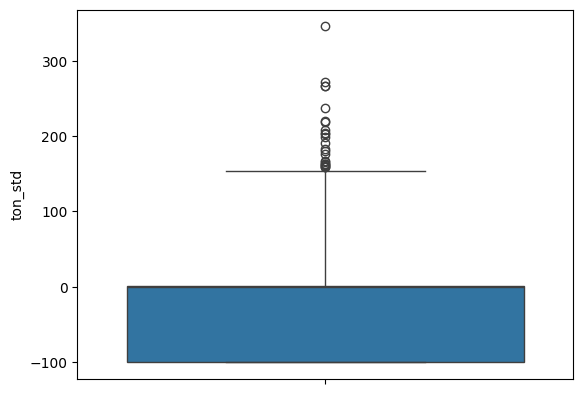

In [22]:
display(kpis.ton_std.describe())
sns.boxplot(data=kpis, y = "ton_std")

#### Arbol Decisión
Total = 15k
##### Alerta 1 Pedidos con pocos Registros (Menos de 5 observaciones en el periodo de analisis 1.5 años)
* Cuantas Observaciones tiene (14976)
     4 observaciones 9060 (60%)
    < 4 Observaciones 5916 (40%)
    Calculamos la cantidad de obsrvaciones con alertas

In [23]:
alerta_1_pvo = pvo#[pvo.id.isin(alerta_1.id) &(pvo.toneladas_plan_ventas > 0)]
# PIVOTEAMOS PARA TENER UNA COLUMNA POR FECHA
alerta_1_pvo = pd.pivot_table(data = alerta_1_pvo,  index=["id"], columns =["MesAnio"],  values="toneladas_plan_ventas", aggfunc="sum").fillna(0)
# CAMBIAMOS EL NOMBRE DEL MES PARA GENERALIZAR
alerta_1_pvo.columns = ["pvo_nxt_"+ str(i +1) for i,j in enumerate(alerta_1_pvo.columns)]
alerta_1_pvo = alerta_1_pvo.reset_index()
alerta_1_pvo

,id,pvo_nxt_1,pvo_nxt_2,pvo_nxt_3,pvo_nxt_4,pvo_nxt_5,pvo_nxt_6
0,"""52"""" STRETCHER BAR BOLT STYLE""_HOUSTON",0.14174,0.141746,0.141746,0.14174,0.14174,0.19368
1,"""66"""" STRETCHER BAR BOLT STYLE""_HOUSTON",0.03429,0.034286,0.034286,0.03429,0.03429,0.03116
2,"""BRACE PIN 1/2"""" X 10"""" HDG""_HOUSTON",0.31177,0.311765,0.311765,0.31177,0.31177,0.40662
3,"""BRACE PIN 1/2"""" X 4"""" HDG""_HOUSTON",0.08362,0.083634,0.083634,0.08362,0.08362,0.10595
4,"""HIGHER FLOW - ROJO VALVE 3/4""""""_HOUSTON",0.00102,0.001185,0.000652,0.00065,0.00065,0.00013
...,...,...,...,...,...,...,...
22628,"ZR SINUOS WIRE .148"" 1074 A- 600-950KG_LAREDO ...",10.96631,2.262443,2.714932,3.16742,2.26245,0.51122
22629,"ZR SINUOS WIRE .162"" 1074 A- 600-900KG_CHICAGO...",0.83728,0.000000,0.000000,0.00000,0.00000,0.00000
22630,"ZR SINUOS WIRE .162"" 1074 A- 600-900KG_LAREDO ...",1.67456,0.000000,0.000000,0.00000,0.00000,0.00000
22631,"ZR SINUOS WIRE .162"" 1074 A- 600-900KG_MACROHU...",2.09320,0.000000,0.000000,0.00000,0.00000,10.84386


In [24]:
alerta_1 = kpis[kpis.var_mcc_4_or_less == True].copy()
# fILTRAMOS LOS IDS QUE TIENEN PVO Y TONELAJE MAYOR A CERO
alerta_1_pvo = pvo[pvo.id.isin(alerta_1.id) &(pvo.toneladas_plan_ventas > 0)]
# PIVOTEAMOS PARA TENER UNA COLUMNA POR FECHA
alerta_1_pvo = pd.pivot_table(data = alerta_1_pvo,  index=["id"], columns =["MesAnio"],  values="toneladas_plan_ventas", aggfunc="sum").fillna(0)
# CAMBIAMOS EL NOMBRE DEL MES PARA GENERALIZAR
alerta_1_pvo.columns = ["pvo_nxt_"+ str(i +1) for i,j in enumerate(alerta_1_pvo.columns)]
alerta_1_pvo = alerta_1_pvo.reset_index()
# UNIMOS PARA AGREGAR LA INFORMACIÓN A LA TABLA
alerta_1 = alerta_1.merge(alerta_1_pvo, on = "id", how="left", suffixes=("", "_pvo"))
# ITERAMOS POR COLUMNA EN TABLA DE ALERTA PARA VISUALIZAR ALERTAS
for i, j in enumerate(alerta_1.columns[alerta_1.columns.str.contains("pvo_nxt_")][[0]]):
    # BOLEEANA DE SI TIENE VOLUMEN
    alerta_1["alerta_has_vol_" +str(i+1)] = np.where((alerta_1[j].fillna(0)> 0) , True, False)  #& (alerta_1.msc >= 1)
    print("alerta_pvo Mes ", str(i +1))
    display(pd.crosstab(alerta_1["alerta_has_vol_" +str(i+1)], alerta_1.r_msc,margins=True ))
    alerta_1["dif_vol_mean_" + str(i+1)] = np.where( alerta_1["alerta_has_vol_" +str(i+1)] == True, alerta_1[j].fillna(0) - alerta_1.ton_media.fillna(0), None)
    print("Alertas")
    display(alerta_1.sort_values(by ="dif_vol_mean_1" ,  ascending= False).dropna(subset="dif_vol_mean_1").head(5))

kpis["tipoAlerta"] = np.where(kpis.id.isin(alerta_1.id),"A1: Demanda No periodica", None)


alerta_pvo Mes  1


r_msc,1,2,3,4,8,10,12,13,All
alerta_has_vol_1,,,,,,,,,
False,677,229,222,169,1157,632,654,3592,7332
True,324,209,328,254,255,69,65,337,1841
All,1001,438,550,423,1412,701,719,3929,9173


Alertas


,id,mcc,ton_media,ton_std,fecha_inicio,fecha_fin,r_ton_med,r_mcc_med,qdate,msc,r_msc,Freq,r_freq,Q,len_Q,var_mcc_4_or_less,ACEROS_pv_1,ALAMBRES_pv_1,DEACERO SOLUTIONS_pv_1,FILIALES ALAMBRES_pv_1,USA_pv_1,pvo_nxt_1,pvo_nxt_2,pvo_nxt_3,pvo_nxt_4,pvo_nxt_5,pvo_nxt_6,alerta_has_vol_1,dif_vol_mean_1
7328,"ENGINEERING MESH (SOG6) 18"" 18 D8.3 X D8.3 - 7...",3,42.527333,9.811024,2025-02-01,2025-04-01,4,4,202501,4.0,4,1.0,1,21,2,True,NaN,NaN,443.0,NaN,NaN,443.00000,526.000000,138.75077,400.0,0.0,0.0,True,400.472667
8361,"REDONDO CARRETERO 1""- G42 A 60 CMS_PLANTA INGE...",1,0.834000,-100.000000,2025-04-01,2025-04-01,2,2,202502,4.0,4,24.0,24,2,1,True,NaN,NaN,60.0,NaN,NaN,60.00000,0.000000,0.00000,0.0,0.0,0.0,True,59.166
8424,PC STRAND GALVANIZED CABLE MOORE - A 6000 FT 1...,2,9.309000,7.222389,2025-04-01,2025-05-01,4,4,202502,3.0,3,1.0,1,2,1,True,NaN,NaN,NaN,NaN,59.06565,59.06565,59.065653,0.00000,0.0,0.0,0.0,True,49.75665
8472,"ALAMBRE GALVANIZADO XTREME 0.080"" 50KG_ALAMBRE...",1,1.000000,-100.000000,2025-05-01,2025-05-01,2,2,202502,3.0,3,24.0,24,2,1,True,NaN,50.0,NaN,NaN,NaN,50.00000,0.000000,0.00000,0.0,0.0,0.0,True,49.0
6635,"PI, ALAMBRE PULIDO INDUSTRIAL .072"" 1006-VERD ...",1,92.949000,-100.000000,2024-11-01,2024-11-01,4,4,202404,9.0,10,24.0,24,4,1,True,NaN,NaN,NaN,137.5,NaN,137.50000,137.500000,137.50000,137.5,137.5,137.5,True,44.551


In [25]:
#alerta_1.sort_values(by ="dif_vol_mean_1" ,  ascending= False).dropna(subset="dif_vol_mean_1").to_csv("alertas_1.csv")

In [26]:
kpis[kpis.tipoAlerta.isna()].describe()

,mcc,ton_media,ton_std,fecha_inicio,fecha_fin,qdate,msc,Freq,Q,len_Q,ACEROS_pv_1,ALAMBRES_pv_1,DEACERO SOLUTIONS_pv_1,FILIALES ALAMBRES_pv_1,USA_pv_1
count,6087.000000,6087.000000,6087.000000,6087,6087,6087.000000,6087.000000,6087.000000,6087.000000,6087.000000,317.000000,3541.000000,4.000000,202.000000,910.000000
mean,12.762937,11.357432,7.020577,2024-02-11 15:15:03.104977920,2025-06-04 13:54:22.888122112,202403.455561,1.879579,1.571546,3424.252012,3.770330,15.013539,9.062225,17.500000,25.979550,18.576026
min,5.000000,0.001000,0.000000,2024-01-01 00:00:00,2024-05-01 00:00:00,202401.000000,0.000000,1.000000,21.000000,2.000000,0.006890,0.000010,5.000000,0.015140,0.000170
25%,7.000000,0.397889,0.293733,2024-01-01 00:00:00,2025-06-01 00:00:00,202401.000000,0.000000,1.000000,4231.000000,4.000000,0.259990,0.248140,5.000000,0.666670,0.708398
50%,13.000000,1.875429,1.244896,2024-01-01 00:00:00,2025-07-01 00:00:00,202401.000000,1.000000,1.000000,4231.000000,4.000000,1.704980,1.056470,7.500000,3.345335,3.038930
75%,18.000000,7.633684,5.334799,2024-02-01 00:00:00,2025-08-01 00:00:00,202401.000000,2.000000,2.000000,4231.000000,4.000000,12.596670,4.488110,20.000000,14.813410,14.799435
max,20.000000,630.118600,272.190487,2025-04-01 00:00:00,2025-08-01 00:00:00,202502.000000,15.000000,5.000000,4231.000000,4.000000,351.494160,850.335000,50.000000,700.000000,640.934350
std,5.398100,33.554926,18.457929,NaN,NaN,14.711330,2.865845,0.832367,1599.349946,0.479779,37.849124,38.487248,21.794495,83.031720,49.950582


In [27]:
analisis = kpis[["mcc", "msc", "Freq", "ton_media","id", "ton_std"]].set_index("id")
analisis.corr()

,mcc,msc,Freq,ton_media,ton_std
mcc,1.000000,-0.619711,-0.590122,0.192990,0.549396
msc,-0.619711,1.000000,0.440320,-0.107425,-0.450659
Freq,-0.590122,0.440320,1.000000,-0.113682,-0.952308
ton_media,0.192990,-0.107425,-0.113682,1.000000,0.332066
ton_std,0.549396,-0.450659,-0.952308,0.332066,1.000000


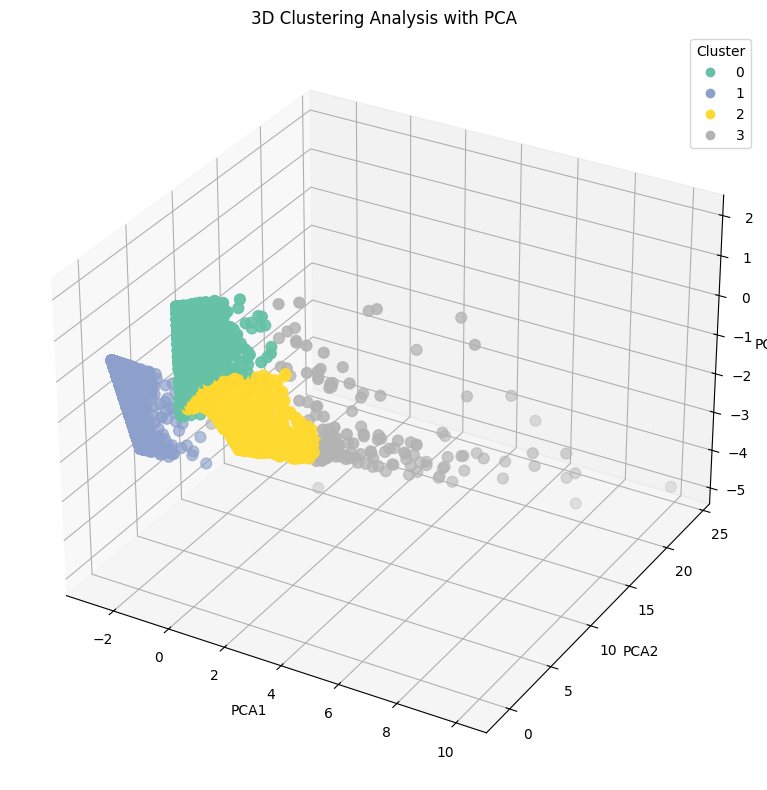

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Assuming you already have your DataFrame:
# analisis = kpis[["mcc", "msc", "Freq", "ton_media", "len_Q", "id"]].set_index("id")
# Standardize the data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(analisis)

# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_components)

# Add PCA components and cluster labels to the DataFrame
analisis['PCA1'] = pca_components[:, 0]
analisis['PCA2'] = pca_components[:, 1]
analisis['PCA3'] = pca_components[:, 2]
analisis['Cluster'] = clusters
# 3D Scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(analisis['PCA1'], analisis['PCA2'], analisis['PCA3'],
                     c=analisis['Cluster'], cmap='Set2', s=60)
ax.set_title('3D Clustering Analysis with PCA')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

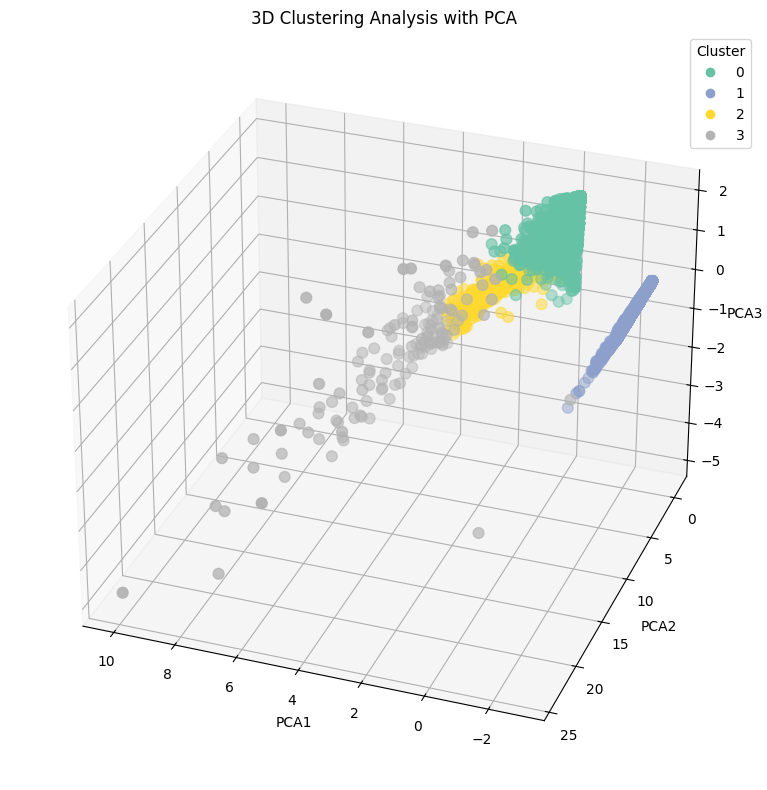

In [30]:
# 3D Scatter plot with custom view angle
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(analisis['PCA1'], analisis['PCA2'], analisis['PCA3'],
                     c=analisis['Cluster'], cmap='Set2', s=60)

# Set custom view angle
ax.view_init(elev=30, azim=110)  # Adjust these values as needed

ax.set_title('3D Clustering Analysis with PCA')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()
